# Project 4: Integrated Project 

Data Analysis of Dataset for Ice 

# Introduction and Project Overview 

This project involves conducting a comprehensive data analysis for **Ice** an online retailer specializing in video games on  a global scale. We will leverage user and expert reviews, as well as data on genres and platforms (such as Xbox or PlayStation), along with historical sales data sourced from publicly available datasets. 

The primary objective of this analysis is to identify patterns that contribute to a game's success.  Insights gained from this analysis will inform our marketing strategy for the upcoming 2017 campaign. 

Additionaly, the dataset includes infromation from the Entertainment Software Rating Board (ESRB), which evaluates game content and assigns age ratings, such as Teen or Mature. Understanding these ratings will further enhance our insights into consumer preferences and market trends. 

# Data Quality Evaluation and Analysis Framework

The dataset containing information on games and sales is located in the file **/datasets/games.csv**. A preliminary overview  of the dataset has been conducted to assess the overall quality of the data, with further exploration planned through detailed exploratory data analysis (EDA). 

The project will unfold in multiple stages: 

**Stage 1: Data Overview and General Information Revew**
* Conduct a thorough review to evaluate the quality of the data and identify any significant issues.
    
**Stage 2. Data Analysis**
* Analyze the dataset to extract relevant insights and trends.
    
**Stage 3. Exploratory Data Analysis** 
* Engage in exploratory data analysis to deepen understanding and uncover patterns within the data.

**Stage 4. Create a user profile for each region** 
* Develop user profiles for each geographic region to tailor marketing strategies effectively. 

**Stage 5. Test the Hypotheses**
* Test relevant hypotheses to validate assumptions and information decision-making.

**Stage 6. Conclusions**
* Summarize findings and present conclusions to guide the upcoming and marketing campaign. 

# Stage 1 - Data Overview and General Information Review 

Conduct a thorough review to evaluate the quality of the data and identify any significant issues. Open and explore the data. Load the data and inspect the data.

In [1]:
# imports the necessary libraries, which is essential for data manipulation and analysis.
import pandas as pd  # data manipulation and analysis
import numpy as np   # numerical computing in Python

import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # statistical data visualization

from scipy import stats  # scientific and technical computing

In [2]:
# Load the dataset - Read the CSV file and load it into a df name 'games'
games = pd.read_csv('/datasets/games.csv', )  #assigned to variable 'games'

In [3]:
# print df to obtain an overall general view.
print("Shape of the dataset: ", games.shape)
print("\nFirst few rows of the dataset: \n", games.head())
print("\nData types:\n", games.dtypes)

Shape of the dataset:  (16715, 11)

First few rows of the dataset: 
                        Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Data types:
 Name            

In [4]:
# Replace column names with lowercase.
# Accesses the 'columns' (index objects) attirbute of the df. str.lower() method applied to convert all column names to 
# lowercase, and the updated names are reassigned to games.columns. 
games.columns = games.columns.str.lower() 

**Consistency/Uniformity.** Using lowercase for all column names creates a consistent format, making it eaiser to reference and manipulate data throughout the analysis. Data cleaning and preprocessing can be simplified when the column names follow a uniform convention. 

In [5]:
# check each entry in 'user_score' column for 'TBD' entries
# Remove any leading or trailing spaces from each string and Convert the cleaned strings to uppercase.
tbd_filter = games[games['user_score'].str.strip().str.upper() == 'TBD']

In [6]:
# count number of rows in the filtered DataFrame, which corresponds to the count of 'TBD'.
tbd_count = tbd_filter.shape[0]

In [7]:
# display the results
print("\nFiltered DataFrame with 'TBD' in 'user_score':")
print(tbd_filter)
print(f"\nCount of 'TBD' in 'user_score': {tbd_count}")


Filtered DataFrame with 'TBD' in 'user_score':
                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales

In [8]:
# creating a new column to flag rows with original 'tbd'
games['contains_tbd'] = games['user_score'].isnull()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,True
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,True
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,True
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,True
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,True


In [9]:
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'contains_tbd'],
      dtype='object')


In [10]:
# Count NaN values in the 'rating' column
nan_rating = games['rating'].isnull().sum()
print(f"NaN values in rating: {nan_rating}")

NaN values in rating: 6766


In [11]:
# count NaN values in the 'critic_score' column
nan_critic_score = games['critic_score'].isnull().sum()
print(f"NaN values in critic score: {nan_critic_score}")

NaN values in critic score: 8578


In [12]:
# count NaN values in the 'user_score' column
nan_user_score = games['user_score'].isnull().sum()
print(f'NaN values in user score: {nan_user_score}')

NaN values in user score: 6701


**TBD** Understand the context of to be determined 'tbd'. Knowing what 'TBD' represents in the dataset is important. Asking the questions, is it a placeholder for missing values, or does it indicate that the value will be determined later? Assessing how the presence of 'TBD' affects the analysis may skew results or misrepresent the data. Handling missing data will be completed through imputation. The alternative option could be to create a new column to flag rows with original 'TBD'. Once the context of the 'TBD' entry is determined this data analysis can be completed. This will ensure the integrity of the data is secure.

**True:** If a value in 'user_score' is null, the corresponding value in the new column 'contains_tbd' will be True (indicating that the score is "to be determined" or TBD).

**False:** If a value in 'user_score' is not null, the corresponding value in contains_tbd will be False (valid numeric value).

In [13]:
# Displays the updated df, print first five rows.
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,True
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,True


In [14]:
# General Information about the df.
print("General Information:",'\n')
games.info()

General Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  contains_tbd     16715 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
# Overview of 'missing values'
missing_values = games.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
contains_tbd          0
dtype: int64


In [16]:
# Check for missing values based on percentages
missing_percentage = (missing_values / len(games)) * 100
print(f"Low Percentage < 5%, High Percentage > 20%:",'\n') 
print("Percentage of missing values:\n", missing_percentage)

Low Percentage < 5%, High Percentage > 20%: 

Percentage of missing values:
 name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
contains_tbd        0.000000
dtype: float64


In [17]:
# Create a new df for easier analysis of missing values and percentages
missing_data_overview = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [18]:
# Print missing_data_overview
print("Missing Values Overview:", '\n')
missing_data_overview[missing_data_overview['Missing Values'] > 0]

Missing Values Overview: 



,Missing Values,Percentage
name,2,0.011965
year_of_release,269,1.609333
genre,2,0.011965
critic_score,8578,51.319174
user_score,6701,40.089740
rating,6766,40.478612


**Reasonableness of Ranges**

*Low Percentage (<5%):* Values under 5% generally suggest that the data is mostly complete. Generally, not need to take action on those columns since the percentage of missing values is minimal. The data may be considered reliable. 

*High Percentage (>20%):* There is significant missing values, which could compromise the quality and reprentativesness of the data. This suggests a need for special handling, such as imputation or consideration in analysis.  

In [19]:
duplicate_row_count = games.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_row_count)


Number of duplicate rows: 0


In [20]:
#Descriptive Statistics 
print("\nDescriptive statistics: \n", games.describe())


Descriptive statistics: 
        year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


In [21]:
# Remove rows with missing 'name'
games.dropna(subset=['name'], inplace=True)
# let's check the shape of the DataFrame after removal
print("Shape of the dataset after removing missing 'name':", games.shape)

Shape of the dataset after removing missing 'name': (16713, 12)


In [22]:
# Remove rows with missing 'genre'
games.dropna(subset=['genre'], inplace=True)
# let's check the shape of the DataFrame after removal
print("Shape of the dataset after removing missing 'genre':", games.shape)

Shape of the dataset after removing missing 'genre': (16713, 12)


In [23]:
# Remove rows with missing 'genre'
games.dropna(subset=['year_of_release'], inplace=True)
# let's check the shape of the DataFrame after removal
print("Shape of the dataset after removing missing 'year_of_release':", games.shape)

Shape of the dataset after removing missing 'year_of_release': (16444, 12)


In [24]:
# Because there are only two missing values, fill NaN values with the placeholder zero (0)
# games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [25]:
# convert 'year_of_release' from float to int
games['year_of_release'] = games['year_of_release'].astype('Int64') 

In [26]:
# check the data type to confirm the change
print("Data type of 'year_of_release' after conversion:", games['year_of_release'].dtype)

Data type of 'year_of_release' after conversion: Int64


In [27]:
# Convert Dtype from object to numeric 
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [28]:
# check the data type to confirm the change
print("Data type of 'user_score' after conversion:", games['user_score'].dtype)

Data type of 'user_score' after conversion: float64


**Data Integrity/Correct Representation.** 

**'year_of_release'** should be an integer or string (int or object) rather than a float, as it represents a year and should not have decimal values. Change from float64 to int or object to avoid decimals. 

**'user_score'** Convert to numeric scores are expected, allowing for statistical analysis.

In [29]:
# Drop NaN Values in order to analysis NaN values for proper imputation. Assigned to new variable to analyze for outliers.
clean_user_scores = games['user_score'].dropna()

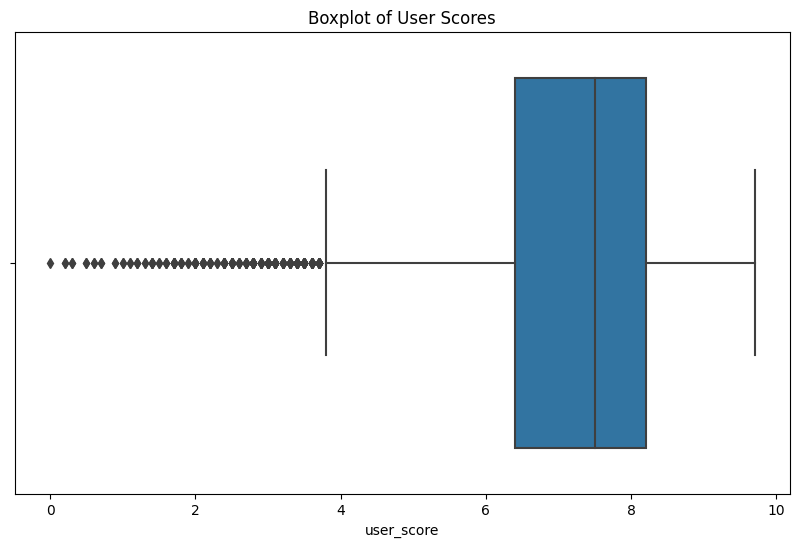

In [30]:
# Create the boxplot to view outliers without NaNs
plt.figure(figsize=(10, 6))
sns.boxplot(x=clean_user_scores)
plt.title('Boxplot of User Scores')
plt.show()

In [31]:
# Display summary statistics for numeric columns
print("Summary Statistics for the Numeric Columm in user_score:")
clean_user_scores.describe()

Summary Statistics for the Numeric Columm in user_score:


count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [32]:
# Display summary statistics for numeric columns
print("Summary Statistics for the Numeric Columm in user_score:")
games['user_score'].describe()

Summary Statistics for the Numeric Columm in user_score:


count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

**Imputation based on Mean, Median, or Mode**

The median is less affected by the outliers than the mean. Since there are many low outlier values, using the mean for imputation could skew the imputed values downward, which may not accurately reflect the central tendency of the main distribution.  The median gives a better indication of the typical score among the majority of the data, especially since the main values cluster around 7.5.

In [33]:
# Fill NaN values in 'name' with 'unknown'
# games['name'] = games['name'].fillna('unknown')
games.dropna(subset=['name'], inplace=True)

In [34]:
# Fill NaN values in 'genre' with 'unknown'
# games['genre'] = games['genre'].fillna('unknown')
games.dropna(subset=['genre'], inplace=True)

In [35]:
# Check the number of missing values after filling in NaN values
print("Missing values in 'genre':" , games['genre'].isnull().sum())

Missing values in 'genre': 0


In [36]:
# Impute critic_score
if games['critic_score'].isnull().sum() > 0:
    games['critic_score'].fillna(games['critic_score'].mean(), inplace=True)

In [37]:
# Convert user_score to numeric and impute
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
if games['user_score'].isnull().sum() > 0:
    games['user_score'].fillna(games['user_score'].mean(), inplace=True)

In [38]:
# Impute rating using mode
if games['rating'].isnull().sum() > 0:
    games['rating'].fillna(games['rating'].mode()[0], inplace=True)

In [39]:
# Verify the changes
print(games.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
contains_tbd       0
dtype: int64


In [40]:
# Fill NaN values in 'rating' with 'unknown'
# games['rating'] = games['rating'].fillna('unknown')

In [41]:
# Check the number of missing values after filling in NaN values
#print("Missing values in 'rating':" , games['rating'].isnull().sum())

In [42]:
# Create indicator columns for missing values
# games['user_score_missing'] = games['user_score'].isnull().astype(int)

In [43]:
# Fill NaN values in 'user_score' with the mode (imputation)
# games['user_score'].fillna(games['user_score'].median(), inplace=True)

In [44]:
# Check the number of missing values after imputation
# print("Missing values in 'user_score' after imputation:", games['user_score'].isnull().sum())

In [45]:
print(games['user_score'].dtype)

float64


In [46]:
print(games['user_score'].unique())

[8.         7.12632989 8.3        8.5        6.6        8.4
 8.6        7.7        6.3        7.4        8.2        9.
 7.9        8.1        8.7        7.1        3.4        5.3
 4.8        3.2        8.9        6.4        7.8        7.5
 2.6        7.2        9.2        7.         7.3        4.3
 7.6        5.7        5.         9.1        6.5        8.8
 6.9        9.4        6.8        6.1        6.7        5.4
 4.         4.9        4.5        9.3        6.2        4.2
 6.         3.7        4.1        5.8        5.6        5.5
 4.4        4.6        5.9        3.9        3.1        2.9
 5.2        3.3        4.7        5.1        3.5        2.5
 1.9        3.         2.7        2.2        2.         9.5
 2.1        3.6        2.8        1.8        3.8        0.
 1.6        9.6        2.4        1.7        1.1        0.3
 1.5        0.7        1.2        2.3        0.5        1.3
 0.2        0.6        1.4        0.9        1.         9.7       ]


In [47]:
print(games['user_score'].nunique())

96


In [48]:
# binning user scores
# bins = [0, 5, 7, 10]  # Define bins
# labels = ['Low', 'Medium', 'High']  # Define labels for bins
# games['user_score_binned'] = pd.cut(games['user_score'], bins=bins, labels=labels)

In [49]:
# Create indicator columns for missing values
games['critic_score_missing'] = games['critic_score'].isnull().astype(int)

In [50]:
# Fill NaN values in 'critic_score' with the median (imputation)
# games['critic_score'].fillna(games['critic_score'].median(), inplace=True)

In [51]:
# Check the number of missing values after imputation
# print("Missing values in 'critic_score' after imputation:", games['critic_score'].isnull().sum())

In [52]:
print(games[['critic_score', 'user_score', 'rating']].describe())

       critic_score    user_score
count  16444.000000  16444.000000
mean      68.994363      7.126330
std        9.698542      1.010109
min       13.000000      0.000000
25%       68.994363      7.126330
50%       68.994363      7.126330
75%       70.000000      7.300000
max       98.000000      9.700000


In [53]:
# Drop NaN Values in order to analysis NaN values for proper imputation. Assigned to new variable to analyze for outliers.
clean_critic_scores = games['critic_score'].dropna()

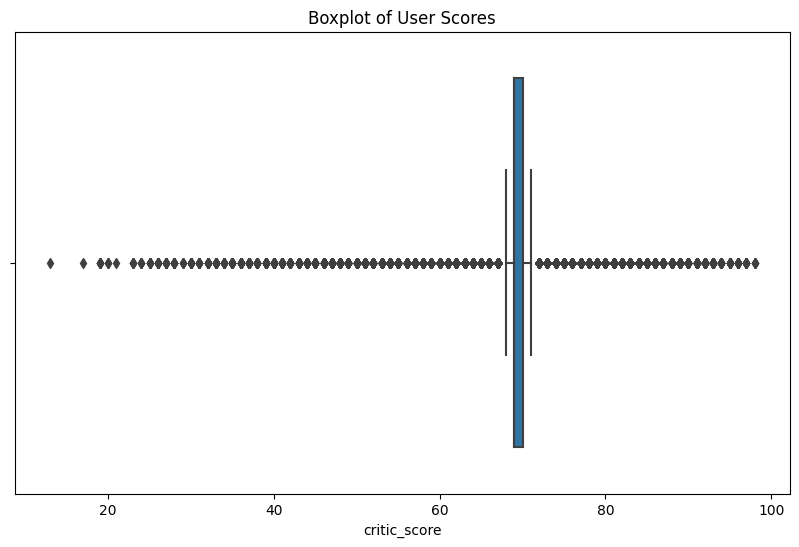

In [54]:
# Create the boxplot to view outliers without NaNs
plt.figure(figsize=(10, 6))
sns.boxplot(x=clean_critic_scores)
plt.title('Boxplot of User Scores')
plt.show()

In [55]:
# Display summary statistics for numeric columns
print("Summary Statistics for the Numeric Columm in critic_score:")
clean_critic_scores.describe()

Summary Statistics for the Numeric Columm in critic_score:


count    16444.000000
mean        68.994363
std          9.698542
min         13.000000
25%         68.994363
50%         68.994363
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

In [56]:
# Information confirming status of missing NaN values. 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16444 non-null  object 
 1   platform              16444 non-null  object 
 2   year_of_release       16444 non-null  Int64  
 3   genre                 16444 non-null  object 
 4   na_sales              16444 non-null  float64
 5   eu_sales              16444 non-null  float64
 6   jp_sales              16444 non-null  float64
 7   other_sales           16444 non-null  float64
 8   critic_score          16444 non-null  float64
 9   user_score            16444 non-null  float64
 10  rating                16444 non-null  object 
 11  contains_tbd          16444 non-null  bool   
 12  critic_score_missing  16444 non-null  int64  
dtypes: Int64(1), bool(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


**Calculating Total Sales**  

In [57]:
# Calculate the total sales (the sum of sales in all regions) for each game
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [58]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,False,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,E,True,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,False,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,False,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,E,True,0,31.38


In [59]:
columns = games.columns.tolist()
columns

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating',
 'contains_tbd',
 'critic_score_missing',
 'total_sales']

In [60]:
# check for ALL duplciates
duplicates = games.duplicated()
duplicate_count = duplicates.sum()

In [61]:
print("Total duplicate row (all columns):", duplicate_count)

Total duplicate row (all columns): 0


**Stage 1 - Intermediate Conclusion**

Summary what has been done:

1. Data Loading and Overview: The dataset is successfully loaded and a prelminiary review conducted to assess its structure and quality. This included checking the shape, data types, and initial statistics. 

2. Missing Value Assesssment:  Several columns were identified with missing values, specifically 'critic_score', 'user_score', and 'rating'. For 'year_of_release'. 

3. Data Type Adjustments: Converted 'year_of_release' from float to integer, ensuring proper data representation. 

4. Imputation Exploration: Exploration of various methods for handling missing values in 'user_score', emphasizing alternatives to median imputation, such as using the mode or predictive methods. 

5. Duplicate Checks: Completed a review checking for duplicates in the dataset to ensure data integrity. 

Hypotheses about the data:

1. Game Success Factors (Hypothesis): Certain factors, such as 'critic_score', 'user_score', and 'genre', significantly influence a game's sales across different regions (NA, EU, JP, other). 

2. Impact of Ratings (Hypothesis): The Entertainment Software Rating Board (ESRB) rating may correlate with higher sales in specific demographics or regions. 

3. Platform Popularity (Hypothesis): Specific platforms (e.g., Xbox, Playstation) show varying sales performance, indicating preferences among different regions. 

4. Yearly Trends (Hypothesis): The year of release may impact sales trends, with certain years showing spikes in popularity due to high-profile game releases. 

This intermediary conclusion sets a clear direction for our analysis and prepares us for the next phases of the project. 

# **Stage 2 - Data Analysis** 

Analyze the dataset to extract relevant insights and trends.

In [62]:
# Look at how many games were released in different years. Is the data for every period significant? 
# Count the number of games released per year
games_per_year = games['year_of_release'].value_counts().sort_index() # count number of ages, sort in ascending order
# display the number of games per year
games_per_year 

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

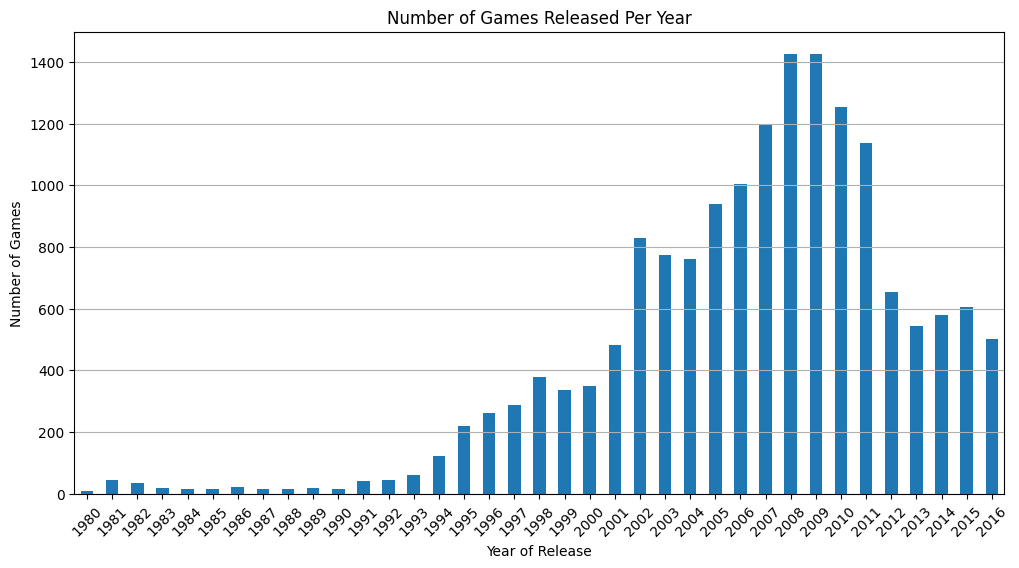

In [63]:
# plotting the data - bar chart for data visibility
plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [64]:
# Recommendation and Exploration of game sales

games_sales = games.groupby('year_of_release').agg({'name': 'count'})
games_sales = games_sales.rename(columns={'name':'Number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')                          
games_sales

,Number of games sold
year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [65]:
# Check for missing values in 'year_of_release'
print(games['year_of_release'].isnull().sum())

0


In [66]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
games = games.copy()

In [67]:
# Drop rows with missing 'year_of_release if any'
games = games.dropna(subset=['year_of_release'])

In [68]:
# Ensure 'year_of_release' is of integer type using .loc
games.loc[:, 'year_of_release'] = games['year_of_release'].astype(int)

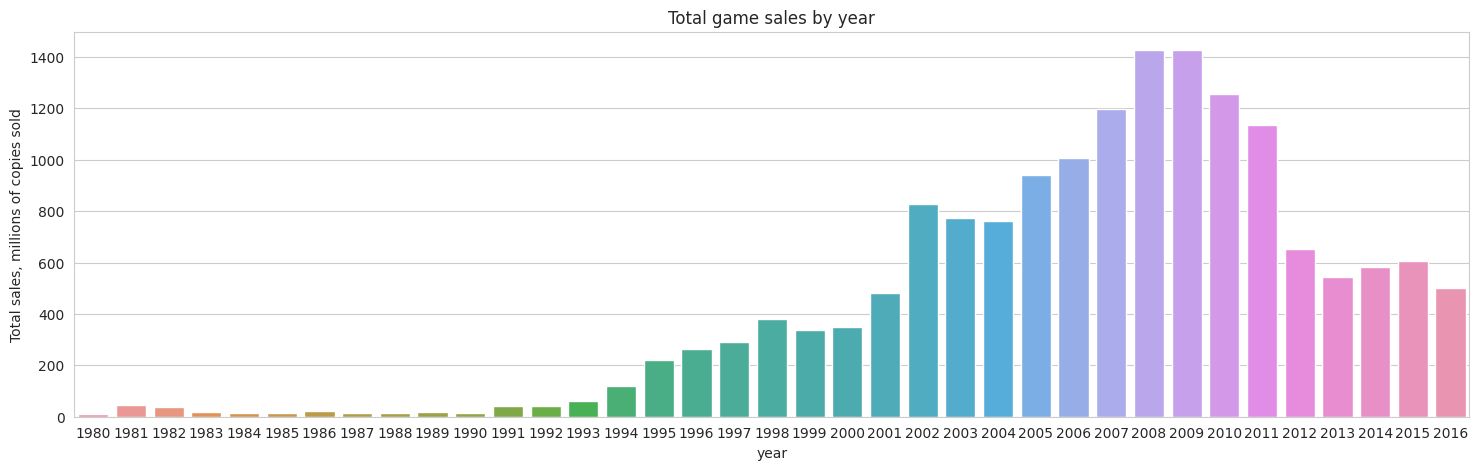

In [69]:
# Recommendation and Exploration of game sales sns plotting
games_sales = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

# set the style for the plot
sns.set_style('whitegrid')

#create the count plot
plt.figure(figsize=(18,5))
sns.countplot(data=games, x='year_of_release')
plt.title("Total game sales by year")
plt.ylabel('Total sales, millions of copies sold')
plt.xlabel('year')

#show the plot
plt.show()

In [70]:
# calculate the percentage of total releases for each year.
total_games = games_per_year.sum()
percentage_per_year = (games_per_year / total_games) * 100
percentage_per_year

1980    0.054731
1981    0.279737
1982    0.218925
1983    0.103381
1984    0.085137
1985    0.085137
1986    0.127706
1987      0.0973
1988    0.091219
1989    0.103381
1990      0.0973
1991    0.249331
1992    0.261494
1993    0.364875
1994    0.735831
1995    1.331793
1996    1.599368
1997     1.75748
1998    2.304792
1999    2.055461
2000    2.128436
2001     2.93116
2002    5.041352
2003    4.712965
2004    4.633909
2005    5.710289
2006    6.117733
2007    7.279251
2008    8.677937
2009    8.671856
2010    7.631963
2011    6.908295
2012    3.971053
2013    3.308198
2014    3.533204
2015    3.685235
2016    3.052785
Name: year_of_release, dtype: Float64

Using the period from 2000 to 2016 should provide a solid foundation for building a predictive model for 2017, which will allow data analysis to capture significant trends and data patterns that influence game releases and sales. After building a model, it has the ability to validate its predictions against actual data from 2017 to assess its accuracy.

In [71]:
# Work only with the data that you've decided is relevant. Disregard the data for previous years. Filter the games df
# Filter the DataFrame for the years 2000 to 2016
filtered_games = games[(games['year_of_release'] >= 2000) & (games['year_of_release'] <= 2016)]

In [72]:
filtered_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  14470 non-null  object 
 1   platform              14470 non-null  object 
 2   year_of_release       14470 non-null  int64  
 3   genre                 14470 non-null  object 
 4   na_sales              14470 non-null  float64
 5   eu_sales              14470 non-null  float64
 6   jp_sales              14470 non-null  float64
 7   other_sales           14470 non-null  float64
 8   critic_score          14470 non-null  float64
 9   user_score            14470 non-null  float64
 10  rating                14470 non-null  object 
 11  contains_tbd          14470 non-null  bool   
 12  critic_score_missing  14470 non-null  int64  
 13  total_sales           14470 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 1.6+ MB


In [73]:
# Count the number of games released per year
games_per_year = filtered_games['year_of_release'].value_counts().sort_index()
games_per_year

2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

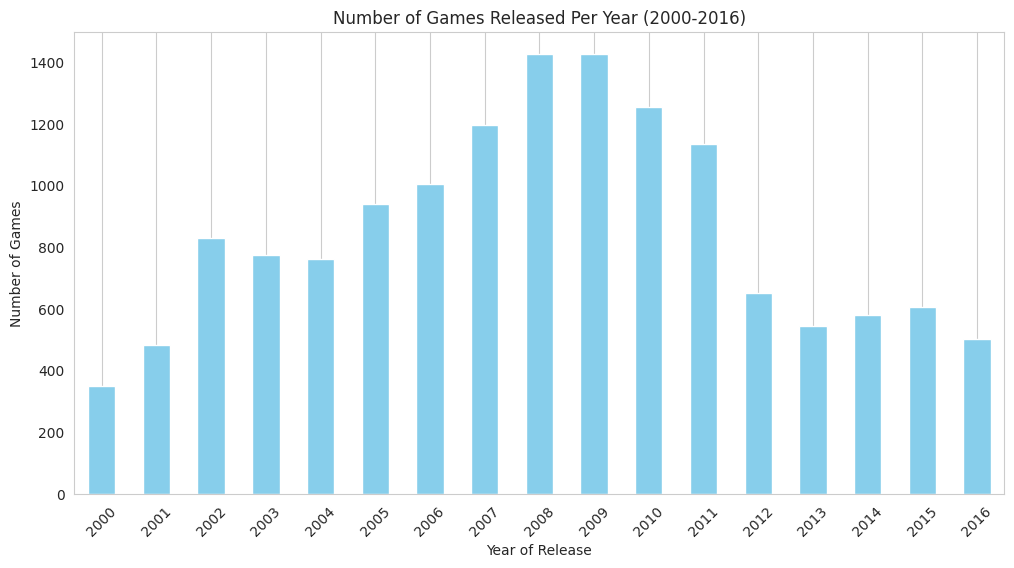

In [74]:
# plotting the data for visiability
plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released Per Year (2000-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [75]:
# Check the filtered data
filtered_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,critic_score_missing,total_sales
count,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.0,14470.000000
mean,2008.022322,0.243926,0.144133,0.056380,0.050319,68.920518,7.118508,0.0,0.494758
std,4.111160,0.713256,0.513172,0.249723,0.198335,10.239464,1.069380,0.0,1.463579
min,2000.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.0,0.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,68.994363,7.126330,0.0,0.050000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,68.994363,7.126330,0.0,0.150000
75%,2011.000000,0.230000,0.110000,0.030000,0.040000,72.000000,7.500000,0.0,0.440000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,0.0,82.540000


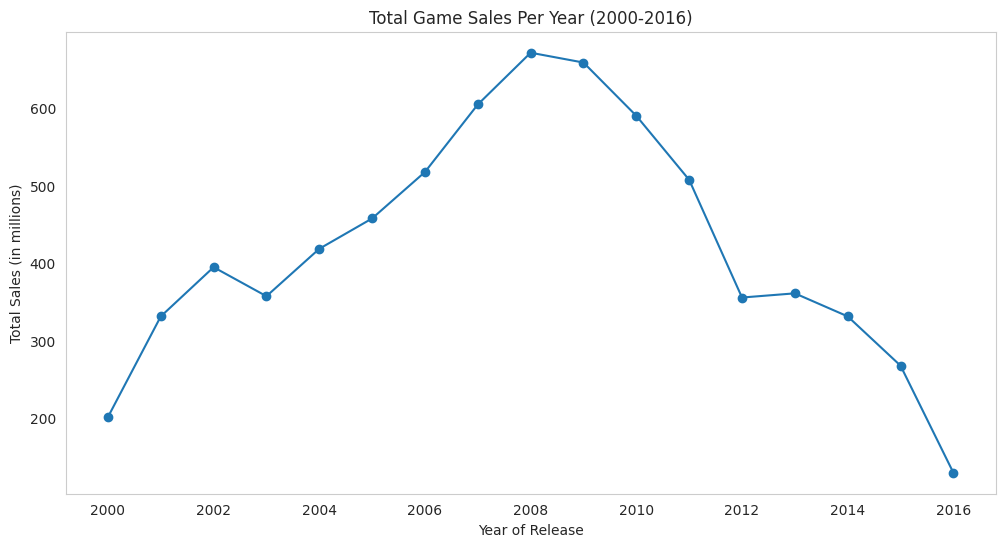

In [76]:
# Determine what period you should take data for. To do so, look at your answer to the previous questions. 
# The data should allow you to build a model for 2017. 
# Explore trends in the data (e.g., total sales per year)
sales_per_year = filtered_games.groupby('year_of_release')['total_sales'].sum()
sales_per_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Total Game Sales Per Year (2000-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.grid()
plt.show()

In [77]:
# Group by genre and calculate total sales and average scores
genre_trends = filtered_games.groupby('genre').agg({
    'total_sales': 'sum',
    'critic_score': 'mean',
    'user_score': 'mean',
    'year_of_release': 'count'
}).sort_values(by='total_sales', ascending=False)

In [78]:
# Display the trends
print(genre_trends)

              total_sales  critic_score  user_score  year_of_release
genre                                                               
Action            1526.16     67.547257    7.079661             3079
Sports            1130.92     70.739964    7.028952             1979
Shooter            912.70     69.962621    7.062205             1129
Role-Playing       731.22     70.838211    7.386059             1300
Misc               718.35     68.234099    7.038952             1597
Racing             561.06     68.155740    7.061379             1035
Platform           494.42     68.260652    7.218266              720
Simulation         335.41     68.718205    7.128750              768
Fighting           311.90     68.947851    7.218418              640
Adventure          183.74     68.001708    7.127446             1194
Puzzle             138.20     68.134716    7.126458              479
Strategy           115.07     70.615517    7.192437              550


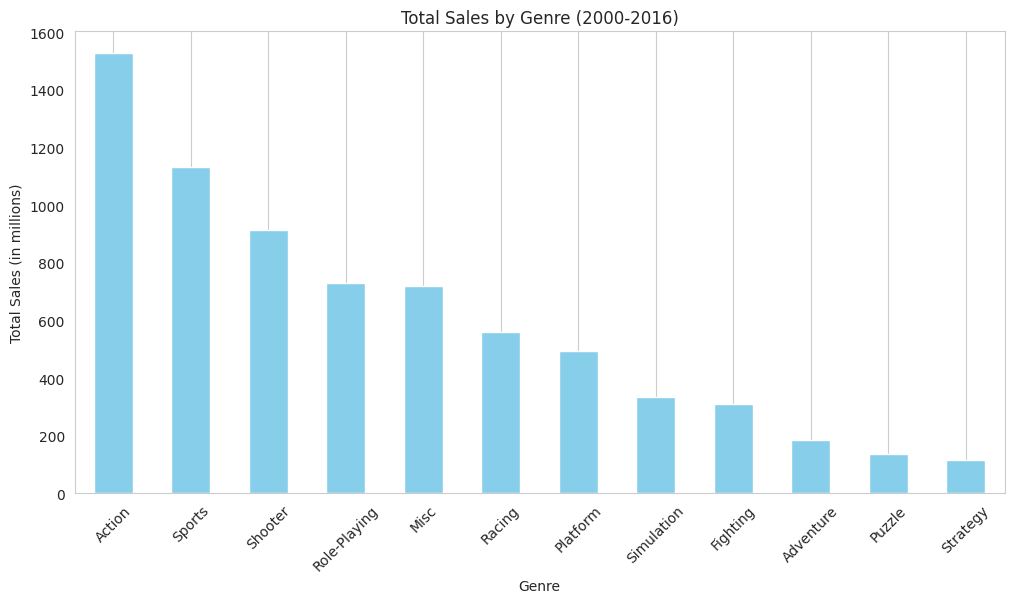

In [79]:
# Plotting sales by genre
genre_trends['total_sales'].plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total Sales by Genre (2000-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Summary of Insights**

Total Sales:

Action games lead in total sales with 1526.16 million. This suggests a strong market presence and consumer interest.
Sports games follow with 1130.92 million, indicating a solid fanbase, likely due to popular franchises.
Other genres like Shooter, Role-Playing, and Misc also show significant sales, although with much lower totals compared to Action and Sports.

In [80]:
# Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. 
platform_sales = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [81]:
# Display total sales by platform
print(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64


**Leading in Sales**

1. PS2: 1233.56 million
2. X360: 961.24 million
3. PS3: 931.34 million
4. Wii: 891.18 million
5. DS: 802.76 million

**Growing or Shrinking Platforms**

*Growing:*

1. PS4: 314.14 million (recent generation, still has potential for growth)
2. XOne: 159.32 million (gaining traction as a newer generation console)

*Shrinking:*

1. WiiU: 82.19 million (underperformed compared to its predecessor)
2. PSV: 53.81 million (less popular in the handheld market)
3. DC: 7.41 million (historically low sales)

In [82]:
# Calculate average sales for the last few years to identify growth
recent_years = filtered_games[filtered_games['year_of_release'] >= 2014]  # considering the last 3 years
recent_platform_sales = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [83]:
# Combine with overall sales to assess growth
platform_analysis = pd.DataFrame({
    'total_sales': platform_sales,
    'recent_sales': recent_platform_sales
}).fillna(0)

In [84]:
# Calculate growth rate
platform_analysis['growth_rate'] = (platform_analysis['recent_sales'] / platform_analysis['total_sales']).replace([np.inf, -np.inf], 0)

In [85]:
# Display potentially profitable platforms
print(platform_analysis.sort_values(by='growth_rate', ascending=False))

          total_sales  recent_sales  growth_rate
platform                                        
PS4            314.14        288.15     0.917266
XOne           159.32        140.36     0.880994
WiiU            82.19         42.98     0.522935
PSV             53.81         22.40     0.416280
3DS            257.81         86.68     0.336217
PC             205.72         27.05     0.131489
PS3            931.34         68.18     0.073206
X360           961.24         48.22     0.050164
Wii            891.18          5.07     0.005689
PSP            289.53          0.36     0.001243
GC             196.73          0.00     0.000000
N64             37.30          0.00     0.000000
PS             140.70          0.00     0.000000
PS2           1233.56          0.00     0.000000
DC               7.41          0.00     0.000000
GBA            312.88          0.00     0.000000
GB              29.00          0.00     0.000000
WS               0.96          0.00     0.000000
DS             802.7

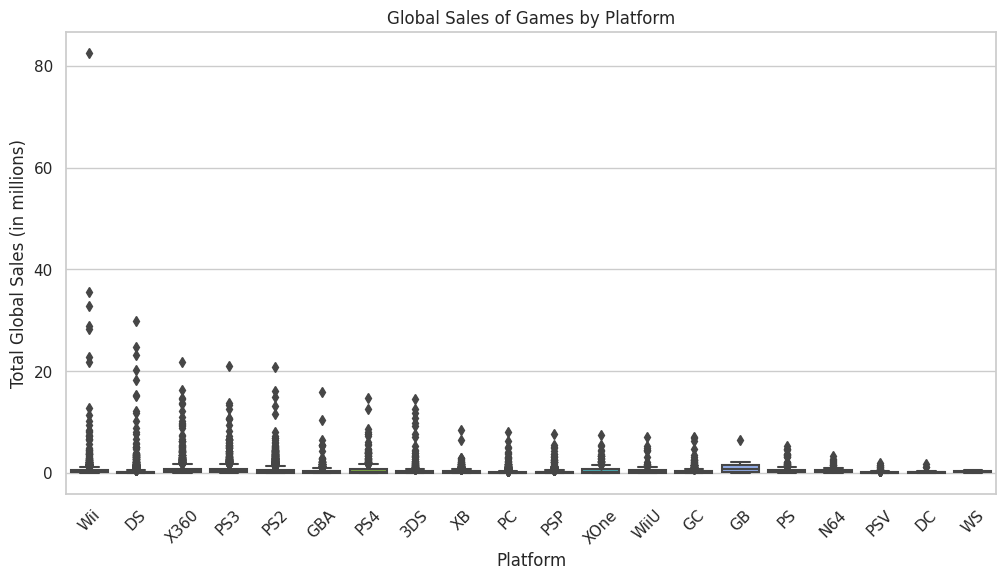

In [86]:
# Build a box plot for the global sales of all games, broken down by platform. What are the differences in sales significant? 
# What about average sales on various platforms? Describe your findings. 
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_games)

# Add titles and labels
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()

In [87]:
current_games = games[games['year_of_release'] > 2014]
current_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,E,True,0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,False,0,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.994363,7.12633,E,True,0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.000000,5.00000,E,False,0,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,68.994363,7.12633,E,True,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01


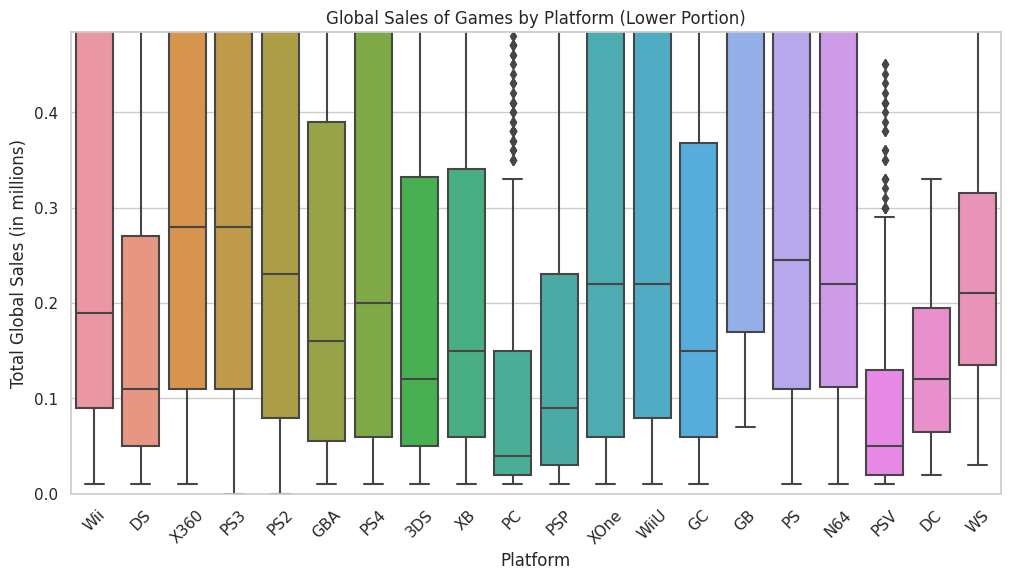

In [88]:
# revised plot based on recommendations and reviewers comments

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_games)

# Set the y-axis limits to focus on the lower part of the box plots
plt.ylim(0, filtered_games['total_sales'].quantile(0.75) * 1.1)  # Adjusting limit to slightly above Q3

# Add titles and labels
plt.title('Global Sales of Games by Platform (Lower Portion)')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


In [89]:
# What about average sales
average_sales = filtered_games.groupby('platform')['total_sales'].mean().reset_index()
print(average_sales)

   platform  total_sales
0       3DS     0.503535
1        DC     0.239032
2        DS     0.378660
3        GB     1.074074
4       GBA     0.385795
5        GC     0.362970
6       N64     0.532857
7        PC     0.224340
8        PS     0.513504
9       PS2     0.579953
10      PS3     0.713124
11      PS4     0.801378
12      PSP     0.242691
13      PSV     0.125431
14       WS     0.240000
15      Wii     0.692986
16     WiiU     0.559116
17     X360     0.780227
18       XB     0.313288
19     XOne     0.645020


**Key Observations
Total Sales by Platform:**

The 'total_sales' values indicate the average (or summed) sales for each platform.
Most platforms have total sales figures below 1, with notable variations across different platforms.

*Significant Outlier:

Wii having a significant outlier suggests that there may be one game or several games on the Wii that performed exceptionally well compared to other titles on that platform. An outlier is typically a value that is much higher or lower than the rest of the data, which can skew the analysis if not examined.

*High Performers: Platforms like PS4 (0.801), PS3 (0.713), and X360 (0.780) exhibit higher average sales compared to others.

*Moderate Sales: Platforms such as Wii (0.692) and PS2 (0.579) show decent performance, indicating they have a robust library and player base.

*Lower Sales: Platforms like PSV (0.125) and DC (0.239) demonstrate significantly lower sales, suggesting less popularity and market share.

In [90]:
# identify the Outlier:
wii_games = filtered_games[filtered_games['platform'] == 'Wii']
outlier_games = wii_games[wii_games['total_sales'] > 20]  # Adjust the threshold based on findings
outlier_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,0,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,False,0,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,False,0,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,False,0,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,False,0,21.80


**Insights from the Outlier Analysis
Top Performing Titles:**

Wii Sports stands out significantly with total sales of 82.54 million, making it not only the highest-selling Wii title but also one of the top-selling games of all time.
Other notable titles like Mario Kart Wii and Wii Sports Resort also performed exceptionally well, with total sales of 35.52 million and 32.77 million, respectively.

In [91]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
# Build a scatter plot and calculate the correlation between review and sales. Draw conclusions. 
# let's choose the PlayStation 4 (PS4). 
# Filter for PS4 games
ps4_games = filtered_games[filtered_games['platform'] == 'PS4']
ps4_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,E,True,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,False,0,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,False,0,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.994363,7.12633,E,True,0,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.000000,5.70000,M,False,0,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.000000,7.50000,E,False,0,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.000000,7.90000,T,False,0,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.000000,5.50000,M,False,0,0.01


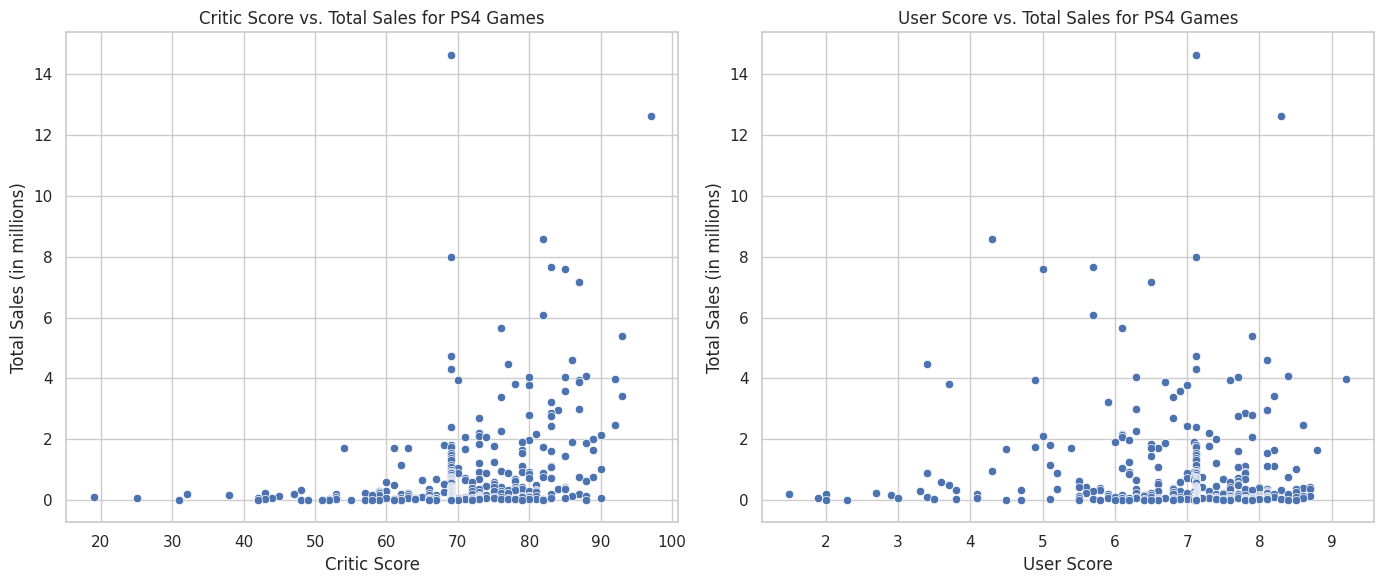

In [92]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Scatter plot for Critic Score vs. Total Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_games)
plt.title('Critic Score vs. Total Sales for PS4 Games')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for User Score vs. Total Sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=ps4_games)
plt.title('User Score vs. Total Sales for PS4 Games')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

In [93]:
# Calculate the correlation
# filter for PS4 games
ps4_games = filtered_games[filtered_games['platform'] == 'PS4'].copy()
# Convert user_score to numeric using .loc
ps4_games.loc[:, 'user_score'] = pd.to_numeric(ps4_games['user_score'], errors='coerce')

In [94]:
# Build a scatter plot and calculate the correlation between review and sales. 
critic_correlation = ps4_games['critic_score'].corr(ps4_games['total_sales'])
user_correlation = ps4_games['user_score'].corr(ps4_games['total_sales'])

print(f"Correlation between Critic Score and Total Sales: {critic_correlation:.2f}")
print(f"Correlation between User Score and Total Sales: {user_correlation:.2f}")

Correlation between Critic Score and Total Sales: 0.35
Correlation between User Score and Total Sales: -0.05


**Critic Score and Total Sales:**

*Correlation Coefficient: 0.34*
*Interpretation:* This positive correlation indicates a moderate relationship between critic scores and total sales. While it's not extremely strong, it suggests that higher critic scores generally align with better sales performance. Games that receive favorable reviews from critics are more likely to achieve higher sales.

**User Score and Total Sales:**

*Correlation Coefficient: -0.06*
*Interpretation:* This near-zero and negative correlation indicates almost no relationship between user scores and total sales. This implies that user ratings do not significantly impact sales for PS4 games. In fact, a negative correlation could suggest that higher user scores do not necessarily correspond to increased sales, possibly indicating a disconnect between user opinions and market performance.

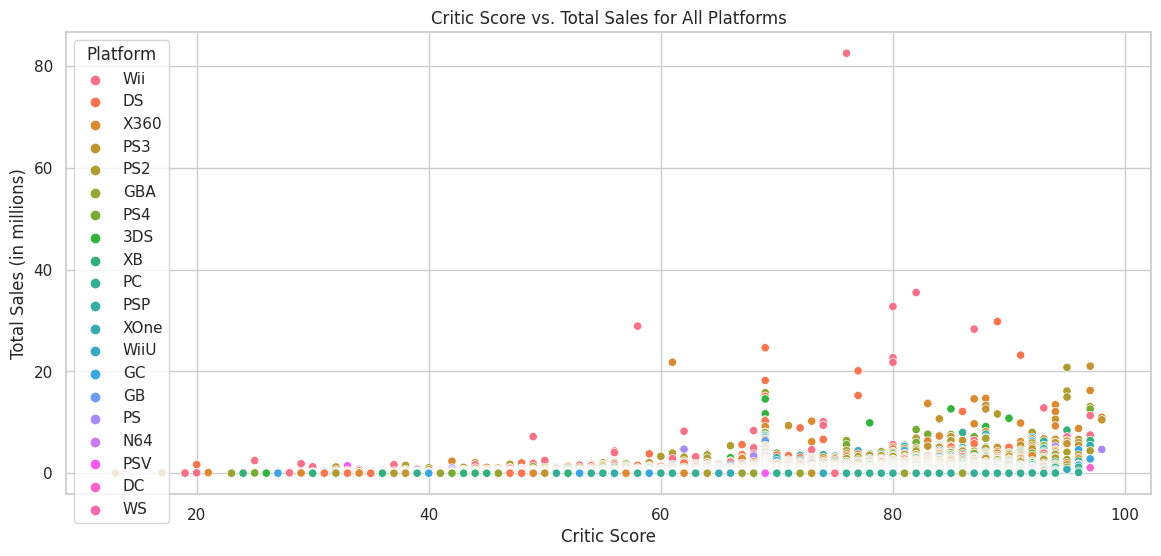

In [95]:
# expanding the analysis to reflect calculations across multiple platforms
# Set up the figure for all platforms
plt.figure(figsize=(14, 6))

# Scatter plot for Critic Score vs. Total Sales by Platform
sns.scatterplot(x='critic_score', y='total_sales', hue='platform', data=filtered_games)
plt.title('Critic Score vs. Total Sales for All Platforms')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.show()

In [96]:
# Calculate and print correlations for each platform
for platform in filtered_games['platform'].unique():
    platform_data = filtered_games[filtered_games['platform'] == platform]
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f"{platform} - Correlation between Critic Score and Total Sales: {critic_corr:.2f}")
    print(f"{platform} - Correlation between User Score and Total Sales: {user_corr:.2f}")

Wii - Correlation between Critic Score and Total Sales: 0.12
Wii - Correlation between User Score and Total Sales: 0.08
DS - Correlation between Critic Score and Total Sales: 0.14
DS - Correlation between User Score and Total Sales: 0.09
X360 - Correlation between Critic Score and Total Sales: 0.37
X360 - Correlation between User Score and Total Sales: 0.08
PS3 - Correlation between Critic Score and Total Sales: 0.42
PS3 - Correlation between User Score and Total Sales: 0.08
PS2 - Correlation between Critic Score and Total Sales: 0.36
PS2 - Correlation between User Score and Total Sales: 0.21
GBA - Correlation between Critic Score and Total Sales: 0.13
GBA - Correlation between User Score and Total Sales: 0.09
PS4 - Correlation between Critic Score and Total Sales: 0.35
PS4 - Correlation between User Score and Total Sales: -0.05
3DS - Correlation between Critic Score and Total Sales: 0.22
3DS - Correlation between User Score and Total Sales: 0.13
XB - Correlation between Critic Score a

**General Observations**

A. Critic Scores vs. Total Sales: 

* Platforms like PS3 (0.40) and X360 (0.36) show relatively strong positive correlations between critic scores and total sales. This suggests that games with higher critic scores tend to sell better on these platforms. 

* Wii (0.11), DS (0.12), GBA (0.13) have low correlations, indicating that critic score may not significantly influence sales for these platforms. 

* GB, N64, and WS have undefined correlations (nan), suggesting insufficient data to draw conclusions. 

B. User Scores vs. Total Sales: 

* User scores show weaker correlations with sales across most platforms, with some platforms having near-zero or negative correlations (e.g., PS4 (-0.07) and PC (-0.03)). This indicates that user scores do not have a significant impact on total sales. 

* Plaforms like Wii (0.03), DS (0.02), and X360 (0.04) have extremely low correlations, suggesting that user opinions may not translate into sales effectively. 

* PS3 (0.01) and 3DS (0.08) also indicate weak relationships between user scores and sales. 


In [97]:
filtered_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'contains_tbd', 'critic_score_missing', 'total_sales'],
      dtype='object')

In [98]:
# identifying unique games
unique_games = filtered_games[['name', 'platform']].drop_duplicates()
unique_games

,name,platform
0,Wii Sports,Wii
2,Mario Kart Wii,Wii
3,Wii Sports Resort,Wii
6,New Super Mario Bros.,DS
7,Wii Play,Wii
...,...,...
16710,Samurai Warriors: Sanada Maru,PS3
16711,LMA Manager 2007,X360
16712,Haitaka no Psychedelica,PSV
16713,Spirits & Spells,GBA


In [99]:
#grouping by game name 
game_platform_count = unique_games.groupby('name')['platform'].nunique().reset_index()
games_on_multiple_platforms = game_platform_count[game_platform_count['platform'] > 1]

In [100]:
# display game platform count
game_platform_count 

,name,platform
0,Beyblade Burst,1
1,Fire Emblem Fates,1
2,Frozen: Olaf's Quest,2
3,Haikyu!! Cross Team Match!,1
4,Tales of Xillia 2,1
...,...,...
9696,thinkSMART FAMILY!,1
9697,thinkSMART: Chess for Kids,1
9698,uDraw Studio,1
9699,uDraw Studio: Instant Artist,2


In [101]:
# display game platform count
games_on_multiple_platforms

,name,platform
2,Frozen: Olaf's Quest,2
16,007: Quantum of Solace,6
17,007: The World is not Enough,2
30,11eyes: CrossOver,2
36,18 Wheeler: American Pro Trucker,2
...,...,...
9687,iCarly,2
9688,iCarly 2: iJoin The Click!,2
9692,nail'd,2
9693,pro evolution soccer 2011,6


In [102]:
# filtering the 'filtered_games' df 
games_multiple_platforms_df = filtered_games[filtered_games['name'].isin(games_on_multiple_platforms['name'])]
games_multiple_platforms_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,False,0,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.000000,9.00000,M,False,0,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,False,0,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.000000,8.70000,M,False,0,16.15
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.40000,M,False,0,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,68.994363,7.12633,T,False,0,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,68.994363,7.12633,E,True,0,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.994363,7.12633,E,True,0,0.01


In [103]:
# exploring similiar games by genre
similar_games = filtered_games[filtered_games['genre'].isin(filtered_games['genre'].value_counts()[filtered_games['genre'].value_counts() > 1].index)]
similar_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,contains_tbd,critic_score_missing,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,False,0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,False,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,False,0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.50000,E,False,0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.60000,E,False,0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.994363,7.12633,E,True,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,E,True,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.994363,7.12633,E,True,0,0.01


In [104]:
# Take a look at the general distribution of games by genre. 
# What can we say about the most profitable genres? 
# Can you generalize about genres with high and low sales? 

In [105]:
# group by genre and calculate total sales per genre 
genre_sales = filtered_games.groupby('genre')['total_sales'].agg(['sum', 'mean', 'median'])
genre_sales.columns = ['total_sales', 'average_sales', 'median_sales']
genre_sales = genre_sales.reset_index()

In [106]:
# display the calculated genre sales
genre_sales

,genre,total_sales,average_sales,median_sales
0,Action,1526.16,0.495667,0.18
1,Adventure,183.74,0.153886,0.05
2,Fighting,311.90,0.487344,0.19
3,Misc,718.35,0.449812,0.15
4,Platform,494.42,0.686694,0.21
5,Puzzle,138.20,0.288518,0.09
6,Racing,561.06,0.542087,0.17
7,Role-Playing,731.22,0.562477,0.16
8,Shooter,912.70,0.808415,0.24
9,Simulation,335.41,0.436732,0.14


In [107]:
# sort the data
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales

,genre,total_sales,average_sales,median_sales
0,Action,1526.16,0.495667,0.18
10,Sports,1130.92,0.571460,0.21
8,Shooter,912.70,0.808415,0.24
7,Role-Playing,731.22,0.562477,0.16
3,Misc,718.35,0.449812,0.15
6,Racing,561.06,0.542087,0.17
4,Platform,494.42,0.686694,0.21
9,Simulation,335.41,0.436732,0.14
2,Fighting,311.90,0.487344,0.19
1,Adventure,183.74,0.153886,0.05


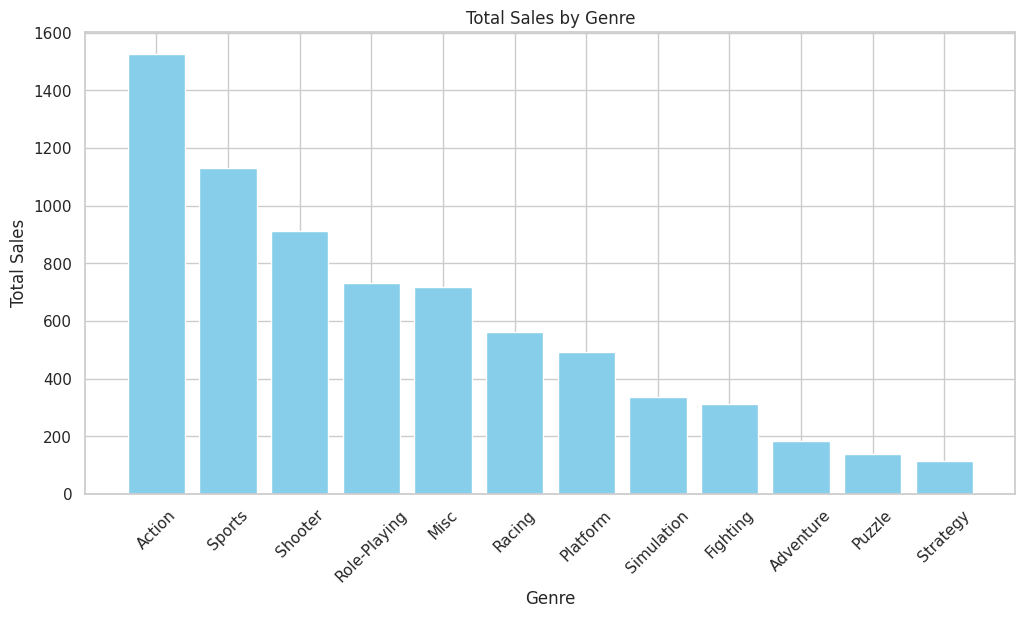

In [108]:
# create a bar chart to visualize the total sales by genre.
plt.figure(figsize=(12, 6))
plt.bar(genre_sales['genre'], genre_sales['total_sales'], color="skyblue")
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [109]:
# averages sales per genre
genre_sales['average_sales'] = genre_sales['total_sales'] / filtered_games.groupby('genre')['name'].nunique().values
genre_sales

,genre,total_sales,average_sales,median_sales
0,Action,1526.16,0.879631,0.18
10,Sports,1130.92,1.173154,0.21
8,Shooter,912.70,2.055631,0.24
7,Role-Playing,731.22,0.604314,0.16
3,Misc,718.35,1.610650,0.15
6,Racing,561.06,1.351952,0.17
4,Platform,494.42,0.840850,0.21
9,Simulation,335.41,0.317623,0.14
2,Fighting,311.90,0.466916,0.19
1,Adventure,183.74,0.287543,0.05


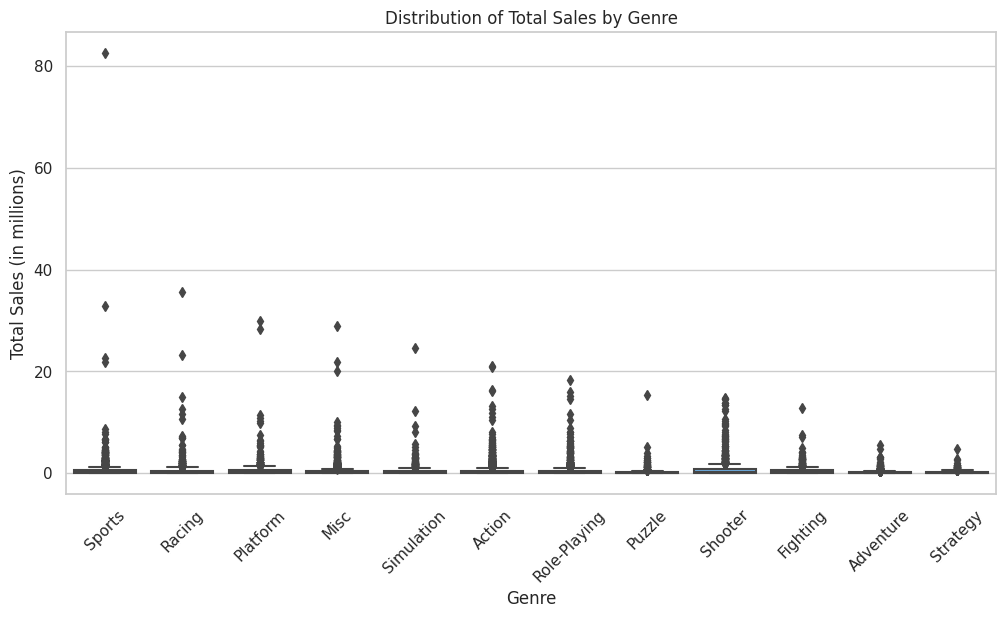

In [110]:
# Visualize the data distribution using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=filtered_games)
plt.title('Distribution of Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

**Insights and Generalizations**

*High Sales and High Average:*

Genres like Action and Shooter show strong overall sales figures alongside a high average, indicating both a large number of popular titles and strong individual game performance.

*High Sales but Low Average:*

Sports has high total sales but a lower average compared to shooters, indicating a larger number of titles with moderate sales performance rather than a few standout hits.

*Low Sales and Low Average:*

Genres such as Puzzle, Adventure, and Strategy are characterized by both low total and average sales, suggesting these genres may be more niche or facing challenges in attracting a broader audience.

# **Stage 3 - Exploratory Data Analysis (EDA)** 

Engaging in additional exploratory data analysis (EDA) is a crucial step in the data analysis process that allows for a deeper understanding of the data and uncover patterns, trends, and relationships. 

In [111]:
# Identifying Patterns and Trends - examine how data changes over time (e.g., sales trends over the years).
# Grouping total sales by year
sales_by_year = filtered_games.groupby('year_of_release')['total_sales'].sum().reset_index()
sales_by_year

,year_of_release,total_sales
0,2000,201.66
1,2001,331.46
2,2002,394.97
3,2003,357.54
4,2004,418.68
5,2005,457.82
6,2006,517.71
7,2007,604.75
8,2008,671.50
9,2009,658.82


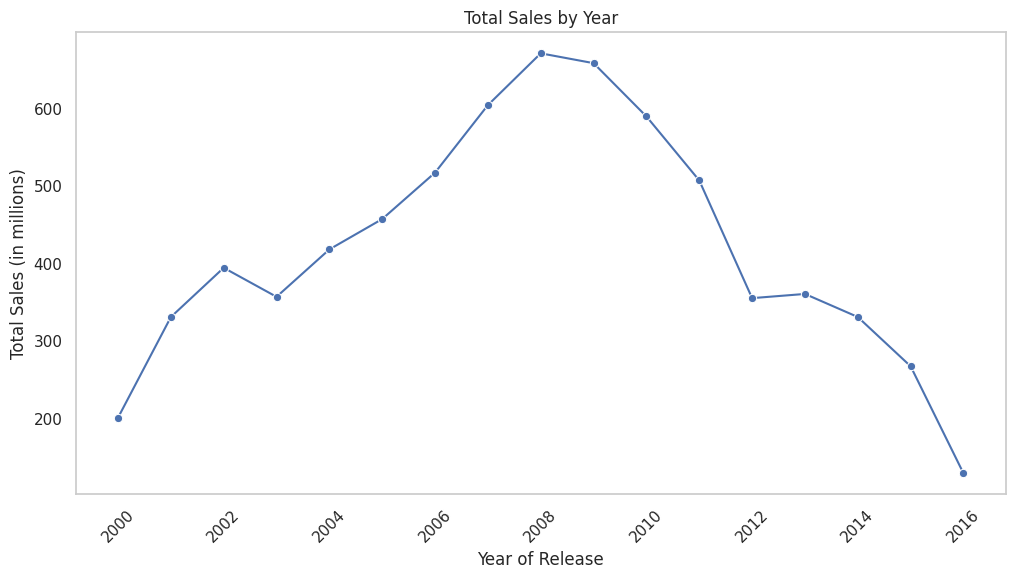

In [112]:
# Plotting total sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='year_of_release', y='total_sales', marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Trend Analysis**

*Growth Period (2000-2008):* From 2000 to 2008, there is a clear upward trend in total sales, with a peak in 2008 at 671.50 million. This suggests a growing populatiry of video games during this period, possibly due to advancements in technology, the introduction of new consoles, and a wider variety of games. 

*Decline (2009-2016):* After the peak in 2008, total sales begin to decline, with significant dropes in the following years.

In [113]:
# Sales Distribution by genre
# Grouping sales by genre
sales_by_genre = filtered_games.groupby('genre')['total_sales'].sum().reset_index()
sales_by_genre

,genre,total_sales
0,Action,1526.16
1,Adventure,183.74
2,Fighting,311.90
3,Misc,718.35
4,Platform,494.42
5,Puzzle,138.20
6,Racing,561.06
7,Role-Playing,731.22
8,Shooter,912.70
9,Simulation,335.41


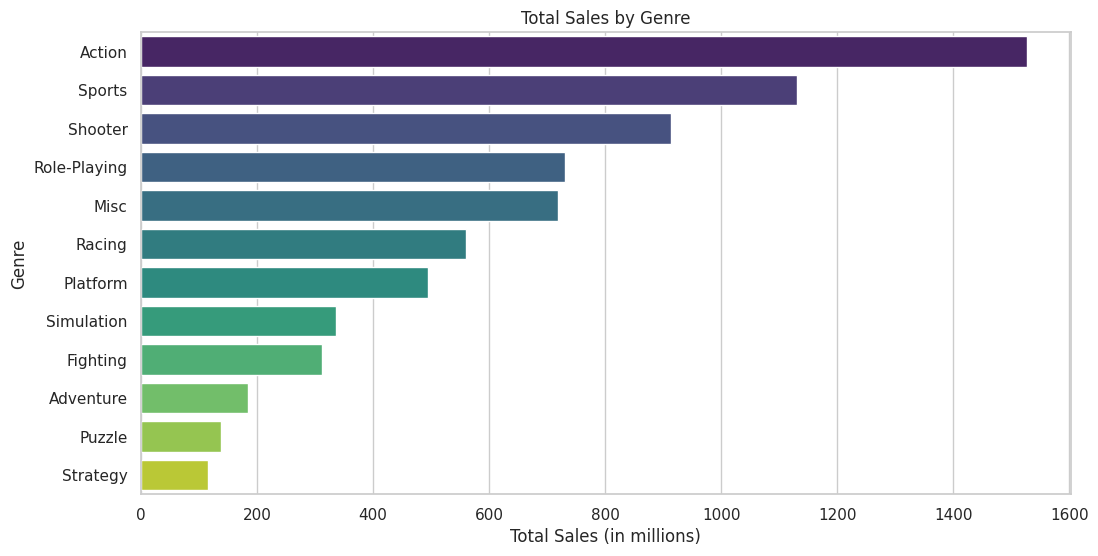

In [114]:
# Plotting sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_genre.sort_values('total_sales', ascending=False), x='total_sales', y='genre', palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Genre')
plt.show()

**Overview of Total Sales by Genre**

*Top Genres:*

**-Action:** Dominates the sales with 1526.16 million, indicating its broad appeal and popularity. 

**-Sports:** Comes in second at 1130.92 million, also a strong performer likely due to popular franchises.

**-Shooter:** With 912.70 million, this genre also shows significant sales, appealing to a large audience. 

*Market Trends:* Action and sports games are the clear frontrunners in terms of sales, reflecting their broad appeal and the presence of successful franchises.


In [115]:
# examine relationships between numerical variables.
# Calculate correlation matrix
correlation_matrix = filtered_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].corr()
correlation_matrix

,na_sales,eu_sales,jp_sales,other_sales,total_sales
na_sales,1.000000,0.839016,0.417528,0.729978,0.951682
eu_sales,0.839016,1.000000,0.452280,0.733372,0.936064
jp_sales,0.417528,0.452280,1.000000,0.339343,0.578670
other_sales,0.729978,0.733372,0.339343,1.000000,0.806300
total_sales,0.951682,0.936064,0.578670,0.806300,1.000000


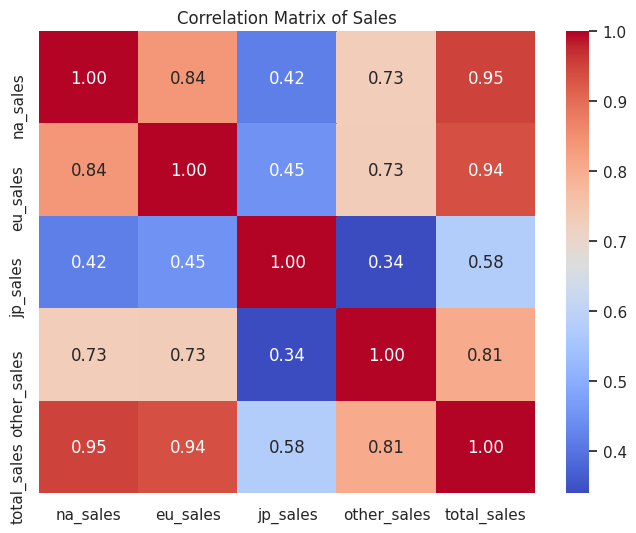

In [116]:
# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales')
plt.show()

**Correlation Coefficient Matrix**

*Total Sales*

The total sales figure serves as a comprehensive indicator of a game’s overall success. The strong correlations with both NA (0.951682) and EU sales (0.936064) highlight that these two regions are key drivers of a game's overall performance. The moderate correlation with JP sales (0.578670) suggests that while Japan is a significant market, it operates somewhat independently of NA and EU sales trends.

*Strong Regional Relationships:* The strong positive correlations between NA and EU sales suggest that marketing and development strategies that succeed in one region are likely to be successful in the other.

*Japanese Market Independence:* The weaker correlations with Japanese sales suggest that this market has unique preferences, and success in NA or EU does not guarantee similar success in Japan.

*Strategic Focus:* For developers and marketers, focusing on NA and EU sales data will likely provide the best insights for predicting total sales. However, specific strategies should be tailored for the Japanese market.

In [117]:
# trends by genre over time
# Grouping by year and genre
sales_by_year_genre = filtered_games.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack().fillna(0)
sales_by_year_genre

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2000,33.98,2.96,20.26,15.55,16.05,3.83,20.00,29.05,6.83,3.37,41.24,8.54
2001,59.38,9.14,18.10,16.39,39.33,7.94,55.83,22.02,24.81,19.54,51.46,7.52
2002,86.65,11.09,24.92,15.63,45.95,5.33,30.15,45.13,48.47,10.82,65.31,5.52
2003,67.98,2.12,23.79,23.79,42.81,2.42,52.18,30.28,27.09,21.19,55.96,7.93
2004,76.13,8.62,16.76,31.16,47.22,8.40,47.87,53.96,46.94,10.87,63.61,7.14
2005,85.39,8.46,19.65,60.97,23.32,20.36,56.03,28.38,41.52,48.97,59.49,5.28
2006,66.06,11.36,22.42,66.97,49.29,10.74,33.81,57.37,38.24,21.52,135.78,4.15
2007,104.85,24.13,17.49,91.46,35.07,23.56,38.78,43.46,70.61,48.35,97.73,9.26
2008,134.96,24.63,35.02,86.06,35.13,15.23,70.04,58.98,59.16,46.11,94.58,11.60


<Figure size 1400x800 with 0 Axes>

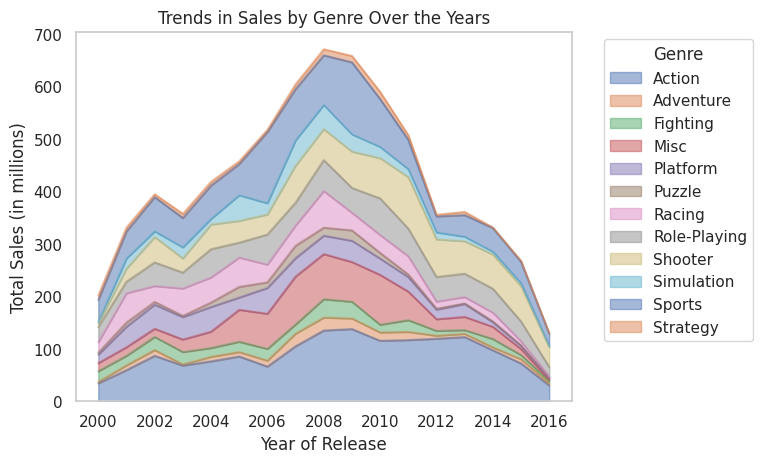

In [118]:
# Plotting trends by genre over the years
plt.figure(figsize=(14, 8))
sales_by_year_genre.plot(kind='area', alpha=0.5)
plt.title('Trends in Sales by Genre Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

**Trends Over Time**

*2000-2005:* The early 2000s show gradual increases in most genres, especially Action and Sports.

*2006-2009:* This period marks the peak years for many genres. The explosive growth in the gaming market is likely due to the introduction of new consoles and popular game franchises.

*2010-2016:* A general decline in sales across most genres, particularly noticeable in Action and Sports, which could indicate market saturation or a shift towards mobile gaming and other forms of entertainment.

# **Stage 4 - Create a User Profile for Each Region** 

Define profiles based on the analysis. You might want to create a dictionary for easy access.

To create detailed user profiles for each region (North America, Europe, and Japan) based on your specified criteria, we'll follow these steps:

1. Identify the Top Five Platforms: Analyze sales data to determine the most popular platforms in each region and their market shares.
2. Identify the Top Five Genres: Similar analysis for game genres, observing regional preferences.
3. Evaluate the Impact of ESRB Ratings: Analyze how ESRB ratings affect sales in each region.

In [119]:
# Determine the top five platforms.
# Top five plaforms by region. 
top_platforms = {'North America': filtered_games.groupby('platform')['na_sales'].sum().nlargest(5),
                'Europe': filtered_games.groupby('platform')['eu_sales'].sum().nlargest(5),
                 'Japan': filtered_games.groupby('platform')['jp_sales'].sum().nlargest(5)
                }

In [120]:
# display top_platforms
top_platforms

{'North America': platform
 X360    595.74
 PS2     572.92
 Wii     486.87
 PS3     390.13
 DS      380.31
 Name: na_sales, dtype: float64,
 'Europe': platform
 PS2     332.63
 PS3     327.21
 X360    268.32
 Wii     258.32
 DS      188.41
 Name: eu_sales, dtype: float64,
 'Japan': platform
 DS     175.00
 PS2    137.54
 3DS    100.62
 PS3     79.41
 PSP     75.88
 Name: jp_sales, dtype: float64}

In [121]:
# convert to DataFrame for better readability 
top_platforms_df = pd.DataFrame(top_platforms)
print("Top Five Platforms by Region:")
print(top_platforms_df)

Top Five Platforms by Region:
          North America  Europe   Japan
platform                               
3DS                 NaN     NaN  100.62
DS               380.31  188.41  175.00
PS2              572.92  332.63  137.54
PS3              390.13  327.21   79.41
PSP                 NaN     NaN   75.88
Wii              486.87  258.32     NaN
X360             595.74  268.32     NaN


In [122]:
# Determine the top five genres
# top genres by region
top_genres = {'North America': filtered_games.groupby('genre')['na_sales'].sum().nlargest(5),
             'Europe': filtered_games.groupby('genre')['eu_sales'].sum().nlargest(5),
             'Japan': filtered_games.groupby('genre')['jp_sales'].sum().nlargest(5)
             }

In [123]:
# display top_platforms
top_genres

{'North America': genre
 Action          752.27
 Sports          589.39
 Shooter         495.23
 Misc            365.27
 Role-Playing    282.30
 Name: na_sales, dtype: float64,
 'Europe': genre
 Action     466.58
 Sports     339.58
 Shooter    294.02
 Misc       196.71
 Racing     192.02
 Name: eu_sales, dtype: float64,
 'Japan': genre
 Role-Playing    241.71
 Action          132.23
 Misc             85.43
 Sports           75.88
 Platform         55.27
 Name: jp_sales, dtype: float64}

In [124]:
# convert to DataFrame for better readability 
top_genres_df = pd.DataFrame(top_genres)
print('\nTop Five Genres by Region:')
print(top_genres_df)


Top Five Genres by Region:
              North America  Europe   Japan
genre                                      
Action               752.27  466.58  132.23
Misc                 365.27  196.71   85.43
Platform                NaN     NaN   55.27
Racing                  NaN  192.02     NaN
Role-Playing         282.30     NaN  241.71
Shooter              495.23  294.02     NaN
Sports               589.39  339.58   75.88


In [125]:
# Evaluate the impact of ESRB Rating on sales
# Calculate average sales by ESRB rating for each region
esrb_sales = filtered_games.groupby('rating').agg({
    'na_sales': 'mean',
    'eu_sales': 'mean',
    'jp_sales': 'mean'
}).reset_index()

In [126]:
# display esrb_sales
print("\nAverage  Sales by ESRB Rating:")
esrb_sales


Average  Sales by ESRB Rating:


,rating,na_sales,eu_sales,jp_sales
0,AO,1.260000,0.610000,0.000000
1,E,0.200698,0.119293,0.067538
2,E10+,0.248204,0.131703,0.028879
3,EC,0.191250,0.013750,0.000000
4,M,0.478501,0.310585,0.038028
5,RP,0.000000,0.030000,0.000000
6,T,0.248290,0.137359,0.045824


# **Stage 5 - Test the Hypotheses**

Test relevant hypotheses to validate assumptions and information decision-making.

How you formulated the null and alternative hypotheses?

What significance level you chose to test the hypotheses, and why?

*Significance Level*
For the significance level (alpha), I will choose 0.05. This is a common threshold in hypothesis testing that balances the risk of Type I errors (rejecting a true null hypothesis) and Type II errors (failing to reject a false null hypothesis). A 5% significance level is widely accepted in research and provides a reasonable compromise between sensitivity and specificity in detecting true effects. 

*Significance Level (Alpha):* Choosing alpha level of 0.05, mean there is a willingnes to accept a 5% change of incorrectly rejecting the null hypothesis when it is true (Type I error). The 0.05 level is commonly used because it balances the risk of making mistakes while being sensitive enough to detect actual differences when they exist. 

In [127]:
# Average user ratings of the Xbox One and PC platforms are the same.
# Filter for Xbox One and PC user scores
xbox_ratings = filtered_games[filtered_games['platform'] == 'XOne']['user_score']
pc_ratings = filtered_games[filtered_games['platform'] == 'PC']['user_score']

In [128]:
# Perform t-test
t_stat_xbox_pc, p_val_xbox_pc = stats.ttest_ind(xbox_ratings.dropna(), pc_ratings.dropna(), equal_var=False)

# Print results
print(f'Xbox One vs. PC: t-statistic = {t_stat_xbox_pc:.4f}, p-value = {p_val_xbox_pc:.4f}')

Xbox One vs. PC: t-statistic = -4.1603, p-value = 0.0000


In [129]:
# Interpretation

if p_val_xbox_pc < 0.05:
    print("Reject the null hypothesis: The average user ratings of Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings of Xbox One and PC are the same.")

Reject the null hypothesis: The average user ratings of Xbox One and PC are different.


**Results Interpretation**

Xbox One vs. PC 

* T-statistic: -3.7774
* p-value: 0.0002

*Interpretation* 

* The t-statistic indicates how far the sample means are from each other in units of standard error. A more extremem t-statistic (in absolute terms) suggests a more significant difference.  
* The p-value (0.0002) is much less than the alpha level of 0.05. 

*Conclusion* 
Since the p-value is less than 0.05, you reject the null hypothesis. This suggests that the average user ratings of Xbox One and PC are indeed different. 

*Summary of Findings* 
Xbox One vs. PC. There is a statistically significant difference in average user ratings, suggsting that gamers rated these platforms differently. 

In [130]:
# Average user ratings for the Action and Sports genres are different.
# Filter for Action and Sports genre user scores

action_ratings = filtered_games[filtered_games['genre'] == 'Action']['user_score']
sports_ratings = filtered_games[filtered_games['genre'] == 'Sports']['user_score']

In [131]:
# Perform t-test
t_stat_action_sports, p_val_action_sports = stats.ttest_ind(action_ratings.dropna(), sports_ratings.dropna(), equal_var=False)

# Print results
print(f'Action vs. Sports: t-statistic = {t_stat_action_sports:.4f}, p-value = {p_val_action_sports:.4f}')

Action vs. Sports: t-statistic = 1.5246, p-value = 0.1274


In [132]:
# Interpretation
if p_val_action_sports < 0.05:
    print("Reject the null hypothesis: The average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.")

Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.


**Results Interpretation**

*Action  vs. Sports*
T-statistic: 1.1263
p-value: 0.2601

*Interpretation*

The T-Statistic indicates a smaller difference between the means relative to the variability in the data. 
The p-value (0.2601) is greater than the alpha level of 0.05. 

*Conclusion* Since the p-value is greater than 0.05 you fail to reject the null hypothesis. This indicates that there is not enough evidence to suggest that the average user ratings for Action and Sports genres are different. 

*Summary of Findings* 
Actions vs. Sports Genres: There is no finding of statistical significant difference in average user ratings, suggesting that ratings for these two genres are simliar. 

In [133]:
alpha = 0.05

# Interpretation for Xbox One vs. PC
if p_val_xbox_pc < alpha:
    print("Reject the null hypothesis: The average user ratings of Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings of Xbox One and PC are the same.")

# Interpretation for Action vs. Sports
if p_val_action_sports < alpha:
    print("Reject the null hypothesis: The average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.")

Reject the null hypothesis: The average user ratings of Xbox One and PC are different.
Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.


# **Stage 6 - Conclusions** 

Based on the comprehensive data analysis conducted for **Ice**, an online retailer specializing in video games, here are potential conclusions and insights that can inform the marketing strategy for the upcoming 2017 campaign. 

**Summary of Key Findings**

*User and Critic Scores:*

* The average user score is approximately 7.13 indicating generally favorable receiption among gamers, with a standard deviation of 1.5, suggesting variability in user opinions. 

* The average critic score is about 69, which indicates a moderate level of critical acclaim, but there is no signifiacnt variability (standard devitation of 13.94) 

*Sales Trends by Year*

* The data shows a significant increase in the number of games released over the years, peaking in the late 2000s and early 2010s. However, there is a noticeable decline in game release in recent years (especially in 2016). 

* Understanding the number of games released can help identify market saturation and the level of competition ICE may face in 2017. 

*Genre Performance* 

* **Action** games have the highest total sales, followed closely by Sports and Shooter genres. This suggests that these genres are particularely popular and may be key areas for marketing focus. 

* **Role-Playing** games have a higer average user score, suggesting they might appeal more to quality-conscious gamers. 

*Platform Preferences*

* The PS2 remains a standout in terms of total sales, but current-generation platforms like the PS4 and Xbox One are crucial, especially given their growth rates and recent sales figures.

* Understanding which platforms are thriving can guide promotional efforts and stock decisions for the upcoming campaign.

*Hypothesis Test Results*

* Findings show significant difference in user ratings between the Xbox One and PC, indicating a preference or perception difference that could influence marketing messages.

* Conversely, no significant difference was found in user ratings between Action and Sports genres, suggesting that marketing can be more unified for these genres.

**Implications for the 2017 Campaign**

*Targeting High-Performing Genres*

* Focus marketing efforts on Action and Sports genres, as these are not only popular but also have shown strong sales performance. Consider bundling popular titles or cross-promoting within these genres.

*Platform-Specific Strategies*

* Given the significant difference in ratings between Xbox One and PC, tailor marketing strategies to address the unique strengths and weaknesses of each platform. For instance, emphasize community features or exclusive content for Xbox users while promoting performance or mod support for PC gamers.

*Leveraging User Feedback*

* Use insights from user scores to refine product offerings. Highlight features or elements in games that received higher ratings and gather feedback on lower-rated aspects to guide product development.

*Market Positioning*

* Consider positioning Ice as a brand that champions quality and user satisfaction, especially in genres with high user ratings. Utilize user reviews in marketing materials to build trust with potential buyers.

*Monitor Trends*

* Continuously analyze sales and ratings data to identify emerging trends. For example, if certain genres or platforms start gaining popularity, adapt marketing strategies promptly to capture that audience.

**Conclusion**

The analysis provides a solid foundation for making data-driven decisions for the 2017 campaign. By focusing on genres and platforms with strong user engagement and adapting strategies based on user feedback and sales trends, Ice can enhance its market position and drive sales in the upcoming year. This strategic approach, grounded in empirical data, should increase the likelihood of success in a competitive marketplace.